##  Data Scientist
Mr Prince kumar sharma


# Performance Matrix for Classification

1. Confusion Matrix
2. Accuracy
3. Precision
4. Recall
5. F1-Score
6. F beta score
7. Classification Report

## What is Confusion matrix ?
Ans.--> Confusion matrix is N x N matrix used for evaluate performance of a classification model.
* Where N is Number of Target classes

* A Good model is one which has high TP and TN, 
* And Where Low FP and FN rates

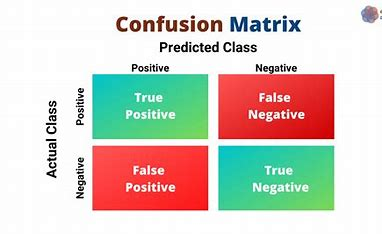

## Accuracy 
:- Accuracy is the total performance of the model in percantage.
* Formula of Accuracy = (TP+TN)/(TP+TN+FP+FN)

###  What is Precision ?
* Precision is the Accuracy of the True positive with the respect of the True positive and False Positive.
##### Precision = TP/(TP+FP)

### What is Recall ?
* Recall is the Accuracy of the True positive with the respect of True poositive and Flase Negative.
##### Recall = TP(TP+FN)

###  What is F1-Score ?
* F1-score ia a Harmonic mean of Precision and Recall, and so it gives a combined idea aboout these two matrix.
* It is maximum when Precision and Recall are equal.
#### F1-SCore  = (2 x Precision x Recall) / Precision +Recall

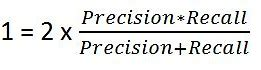

###  Describeing the Confusion the matrix

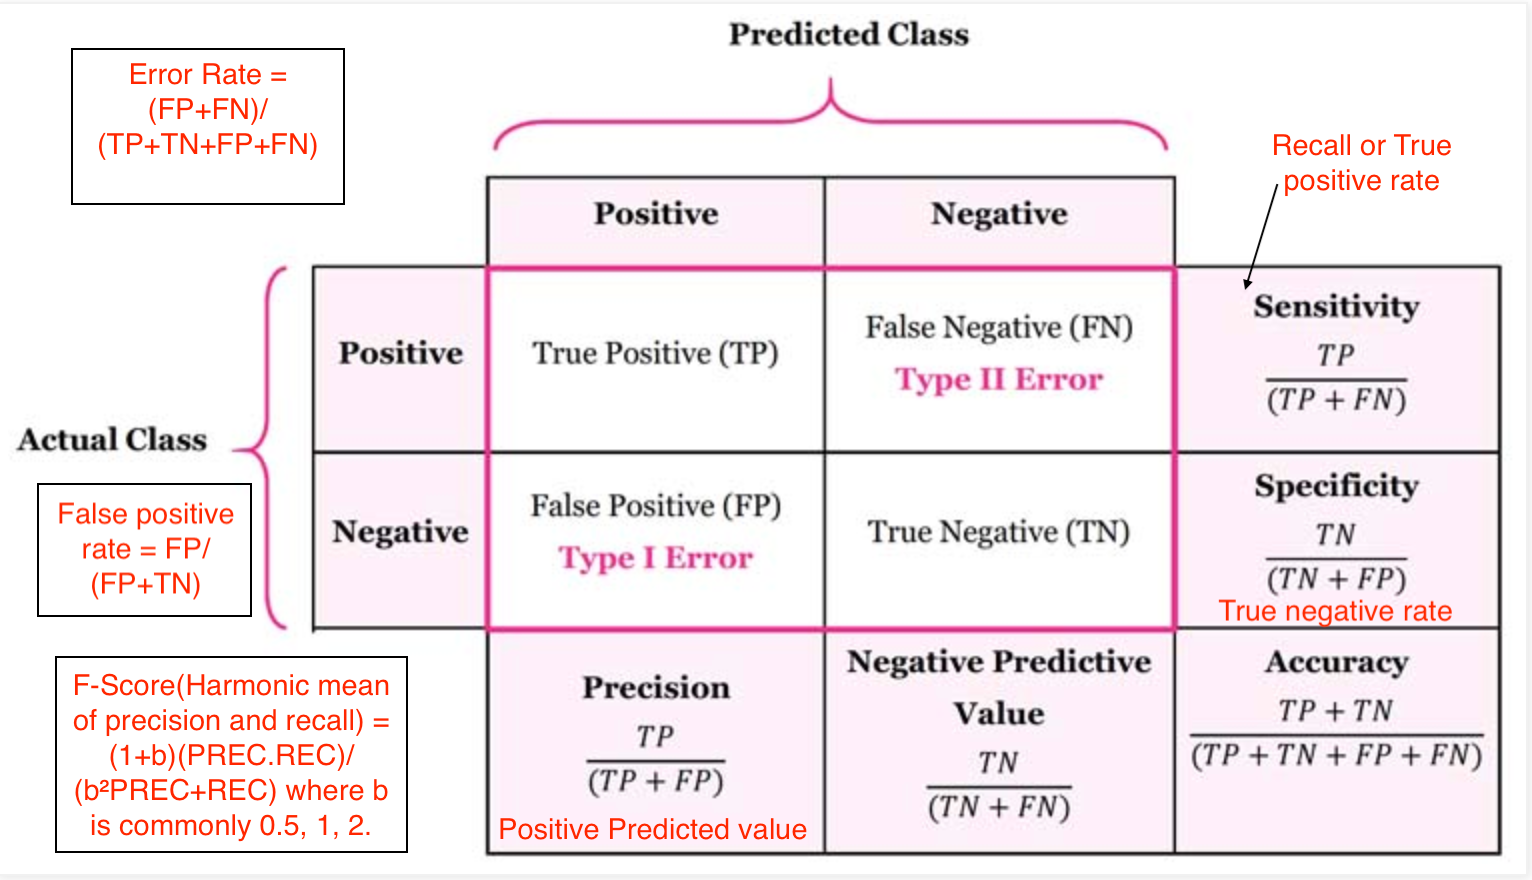

## Import Usefull Library

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as st
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression

# And Last is the Topic of the day is confusion matrix Accuracy Precission Recall and F1-Score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,fbeta_score,recall_score,precision_score

In [53]:
df=datasets.load_breast_cancer()

In [54]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [55]:
df.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [56]:
a=df.feature_names

In [57]:
b=df.data

In [58]:
y=df.target

## Creating a data frame of the features to understand the with the name of the features

In [59]:
x=pd.DataFrame(b,columns=a)

In [60]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [61]:
dff.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [62]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [63]:
dff.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [66]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [67]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [68]:
# Split the data from train and test for machine learning algortihms
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
print("-"*110)
print(f" The shape of the x_train data :- {x_train.shape}")
print("-"*110)
print("-"*110)
print(f" The shape of the x_test data :- {x_test.shape}")
print("-"*110)
print("-"*110)
print(f" The shape of the y_train data :- {y_train.shape}")
print("-"*110)
print("-"*110)
print(f" The shape of the y_test data :- {y_test.shape}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
 The shape of the x_train data :- (455, 30)
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
 The shape of the x_test data :- (114, 30)
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
 The shape of the y_train data :- (455,)
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
 The shape of the y_test data :- (114,)
-------------------------------------------------------

In [75]:
# Apply the Logistic Regression model in this data
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [78]:
pred=lr.predict(x_test)
print("-"*110)
print("-"*110)
print(pred)
print("-"*110)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [79]:
#Now compare the Predictions in  Manually by DataFrame
prince=pd.DataFrame({"Actual":y_test,"predicted":pred})

In [86]:
prince.tail(20).T

,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
Actual,1,1,0,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,1,0
predicted,1,1,0,0,1,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0


* Here is easily show that Number of Error is less.

## Using the Confusion Matrix

In [88]:
cm=confusion_matrix(y_test,pred)
print(cm)

[[41  2]
 [ 1 70]]


## Manually Finding the Precision ,Recall and Accuracy

In [110]:
Precision=cm[0,0]/(cm[0,0]+cm[0,1])
print("-"*110)
print("-"*110)
print(f"The Precision of this data is :- {(Precision*100)}%")
print("-"*110)
print("-"*110)
Recall=cm[0,0]/(cm[0,0]+cm[1,0])
print(f"The Recall Accuracy of this data is :- {Recall}%")
print("-"*110)
print("-"*110)
accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print(f"The Total Accuracy of the dataset is :- {accuracy}")
print("-"*110)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
The Precision of this data is :- 95.34883720930233%
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
The Recall Accuracy of this data is :- 0.9761904761904762%
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
The Total Accuracy of the dataset is :- 0.9736842105263158
--------------------------------------------------------------------------------------------------------------
-----------------------------------------------------

# Finding the Accuracy with the help of the Coding Formula

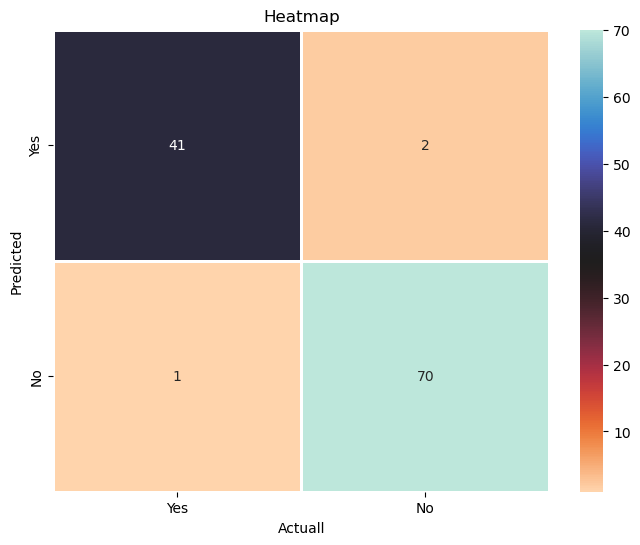

In [138]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="icefire_r",xticklabels=["Yes","No"],yticklabels=["Yes","No"],linewidths=1)
plt.ylabel("Predicted")
plt.xlabel("Actuall")
plt.title("Heatmap")
plt.show()

In [129]:
f1=f1_score(y_test,pred)
acc=lr.score(x_test,y_test)

In [130]:
fb=fbeta_score(y_test,pred,beta=1)

In [131]:
print("-"*110)
print("-"*110)
print(f"The Accuracy with f1-score in this data model :- {f1*100}%")
print("-"*110)
print("-"*110)
print(f"The Accuracy with f beta-score in this data model :- {fb*100}%")
print("-"*110)
print("-"*110)
print(f"The Accuracy with Normally score in this data model :- {acc*100}%")
print("-"*110)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
The Accuracy with f1-score in this data model :- 97.90209790209789%
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
The Accuracy with f beta-score in this data model :- 97.90209790209789%
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
The Accuracy with Normally score in this data model :- 97.36842105263158%
--------------------------------------------------------------------------------------------------------------
---------

# Finally and last is Classification Report

In [134]:
cr=classification_report(y_test,pred)
print("-"*110)
print("-"*110)
print(cr)
print("-"*110)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


# Done my Performance Matrix__